In [ ]:
import pandas as pd

In [1]:
#This visualization works in colab

In [ ]:
data=pd.read_csv('movie_data.csv')
len(data)

50000

In [ ]:
data.head()

review  sentiment
0  In 1974, the teenager Martha Moxley (Maggie Gr...          1
1  OK... so... I really like Kris Kristofferson a...          0
2  ***SPOILER*** Do not read this, if you think a...          0
3  hi for all the people who have seen this wonde...          1
4  I recently bought the DVD, forgetting just how...          0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

***Analyzing data***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


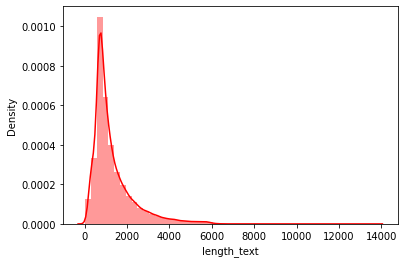

In [ ]:
data['length_text'] = data['review'].str.len()
sns.distplot(data['length_text'], color="r")
plt.show()

In [ ]:
docs = [x for x in data['review']]

In [ ]:
import nltk

***Cleaning data***

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
import re
import string
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [ ]:
# A function to prepare the text for topic modelling
def words(text):
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    text = regex.sub(" ", text.lower())
    words = text.split(" ")
    words = [re.sub('\S*@\S*\s?', '', sent) for sent in words]
    words = [re.sub('\s+', ' ', sent) for sent in words]
    words = [re.sub("\'", "", sent) for sent in words]
    words = [w for w in words if not len(w) < 2]
    words = [w for w in words if w not in stop_words]
    words = [lmtzr.lemmatize(w) for w in words]
    
    return words

<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:6: DeprecationWarning: invalid escape sequence \S
<input>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-69-08cae9460540>:6: DeprecationWarning: invalid escape sequence \S
  words = [re.sub('\S*@\S*\s?', '', sent) for se

In [ ]:
import re

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
docs = [words(x) for x in data['review']]

In [ ]:
from gensim.corpora import Dictionary

In [ ]:
 # Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 10 documents, or more than 20%(no_above=0.2) of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 92284
Number of unique words after removing rare and common words: 22846


***Analyzing words counts using doc2bow***

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
#print(len(corpus))
#corpus[336]
bow_doc_300 = corpus[300]

for i in range(len(bow_doc_300)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_300[i][0], 
                                                     dictionary[bow_doc_300[i][0]], 
                                                     bow_doc_300[i][1]))

Word 65 ("old") appears 1 time.
Word 137 ("line") appears 1 time.
Word 177 ("american") appears 1 time.
Word 185 ("better") appears 1 time.
Word 189 ("chance") appears 1 time.
Word 226 ("new") appears 1 time.
Word 249 ("stuff") appears 1 time.
Word 304 ("making") appears 1 time.
Word 334 ("may") appears 1 time.
Word 394 ("hepburn") appears 1 time.
Word 410 ("might") appears 1 time.
Word 414 ("need") appears 1 time.
Word 589 ("hill") appears 1 time.
Word 811 ("die") appears 1 time.
Word 845 ("almost") appears 1 time.
Word 873 ("hard") appears 1 time.
Word 919 ("famous") appears 1 time.
Word 1058 ("level") appears 1 time.
Word 1128 ("early") appears 1 time.
Word 1165 ("slip") appears 1 time.
Word 1167 ("something") appears 1 time.
Word 1231 ("appreciate") appears 1 time.
Word 1401 ("horrible") appears 1 time.
Word 1647 ("generation") appears 1 time.
Word 1674 ("moment") appears 1 time.
Word 1781 ("pretty") appears 3 time.
Word 1895 ("corny") appears 1 time.
Word 2007 ("amusing") appears 

In [ ]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [ ]:
import gensim.corpora
from gensim.models import ldamodel


***Building LDA model***

In [ ]:
# Build LDA model
# This model took almost an hour to execute
# We tried executing multiple time by tunning the parameters to observe interesting results
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=20,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
get_lda_topics(lda_model, 10)

Topic # 01   Topic # 02   Topic # 03  ...   Topic # 08 Topic # 09   Topic # 10
0       woman         work         show  ...         role       head         best
1        girl     director       series  ...         john        guy  performance
2        love        seems      episode  ...         play       game        music
3       young          may           tv  ...       played        run         love
4         old      however            u  ...          man        car         book
5         kid        quite        world  ...       robert       kill      version
6      family     audience     american  ...      michael       dead         role
7        year       rather  documentary  ...         star       take         play
8      friend          two       season  ...        james     around         cast
9       child      without   television  ...         cast     killed       comedy
10        man        point      message  ...       career     killer    excellent
11        boy          yet      country  ...       murder       shot         song
12       find         feel          new  ...      richard        cop       always
13     father  interesting        state  ...       george     police      classic
14       home       viewer      america  ...         paul       back    wonderful
15        day       moment      history  ...          tom        gun    beautiful
16     school            u      society  ...           mr       team     favorite
17       wife       though    political  ...  performance       room      perfect
18        two         take      reality  ...        crime       turn      amazing
19     mother      perhaps         true  ...      western      start        still

[20 rows x 10 columns]

In [ ]:
#!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vs3.3.0 had to rename the file name, so now use import pyLDAvis.gensim_models

Note: the colab examples have import pyLDAvis.gensim AS gensimvis, and I could rename the file to gensimvis.py then it would simply be import pyLDAvis.gensimvis

In [ ]:
#get_lda_topics(lda_model, 10)

***Visualizing LDA generated topics***

In [ ]:
pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.187832 -0.027810       1        1  28.299334
1     -0.181306 -0.050738       2        1  15.990458
0     -0.002054 -0.087939       3        1  10.208327
9     -0.164508  0.239138       4        1   9.106900
3     -0.081924 -0.001750       5        1   7.091747
8      0.179390 -0.114067       6        1   7.033251
6      0.182736 -0.165227       7        1   6.826382
7      0.089061  0.271448       8        1   6.450390
2     -0.107877 -0.178888       9        1   5.493126
5      0.274315  0.115834      10        1   3.500084, topic_info=        Term          Freq         Total Category  logprob  loglift
77      show  17436.000000  17436.000000  Default  30.0000  30.0000
598     best  12960.000000  12960.000000  Default  29.0000  29.0000
928   horror   7541.000000   7541.000000  Default  28.0000  28.0000
138     love  13111.000000  13111.000000  Default  27.0000  27.0000
628   series   6483.000000   6483.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
1125   death    853.934101   4359.430772  Topic10  -5.2715   1.7221
105   budget    821.138840   3847.589793  Topic10  -5.3107   1.8079
603      fan    857.167961   6696.607994  Topic10  -5.2677   1.2967
139      low    740.329038   3570.660361  Topic10  -5.4143   1.7790
64     night    741.975119   4670.887962  Topic10  -5.4121   1.5126

[589 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1442      2  0.998114  ability
1442      6  0.000928  ability
540       1  0.539046   action
540       5  0.303205   action
540       6  0.124106   action
...     ...       ...      ...
269       9  0.088776     york
270       3  0.966138    young
270       8  0.033684    young
3660      3  0.999334  younger
1106     10  0.999596   zombie

[983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 10, 4, 9, 7, 8, 3, 6])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

***LDA topics generated***

In [ ]:
lda_model.save('model10.gensim')
topics = lda_model.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.017*"woman" + 0.015*"girl" + 0.014*"love" + 0.014*"young" + 0.014*"old" + 0.013*"kid"')
(1, '0.011*"work" + 0.010*"director" + 0.008*"seems" + 0.008*"may" + 0.008*"however" + 0.007*"quite"')
(2, '0.067*"show" + 0.025*"series" + 0.018*"episode" + 0.014*"tv" + 0.011*"u" + 0.009*"world"')
(3, '0.009*"world" + 0.009*"art" + 0.009*"american" + 0.009*"cinema" + 0.008*"black" + 0.008*"white"')
(4, '0.009*"look" + 0.008*"ever" + 0.008*"better" + 0.007*"lot" + 0.007*"something" + 0.007*"watching"')
(5, '0.045*"horror" + 0.015*"blood" + 0.012*"violence" + 0.012*"flick" + 0.012*"gore" + 0.011*"sex"')
(6, '0.015*"war" + 0.009*"man" + 0.008*"hero" + 0.007*"human" + 0.006*"evil" + 0.005*"earth"')
(7, '0.013*"role" + 0.013*"john" + 0.011*"play" + 0.008*"played" + 0.008*"man" + 0.008*"robert"')
(8, '0.011*"head" + 0.011*"guy" + 0.010*"game" + 0.010*"run" + 0.009*"car" + 0.008*"kill"')
(9, '0.026*"best" + 0.018*"performance" + 0.015*"music" + 0.014*"love" + 0.013*"book" + 0.010*"version"')


***BERT Topic Modelling***

In [1]:
!pip install bertopic[visualization] --quiet

     |████████████████████████████████| 57 kB 4.0 MB/s  eta 0:00:01
     |████████████████████████████████| 6.4 MB 42.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 13.2 MB 64.0 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 3.1 MB 41.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.7 MB/s 
     |████████████████████████████████| 1.2 MB 36.1 MB/s 
     |████████████████████████████████| 61 kB 493 kB/s 
     |████████████████████████████████| 636 kB 54.3 MB/s 
     |████████████████████████████████| 895 kB 48.2 MB/s 
     |████████████████████████████████| 1.1 MB 39.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts

In [3]:
!pip install bertopic

In [4]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [5]:
df3 = pd.read_csv("movie_data.csv")

In [6]:
!pip install Unidecode

     |████████████████████████████████| 235 kB 25.7 MB/s eta 0:00:01


***Cleaning data***

In [7]:
from unidecode import unidecode
import re
from re import sub
def clean_text(text,remove_polish_letters):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = remove_polish_letters(text)
    text = str(text)
    text = text.lower()

    # Clean the text
    text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    text = sub(r"\+", " plus ", text)
    text = sub(r",", " ", text)
    text = sub(r"\.", " ", text)
    text = sub(r"!", " ! ", text)
    text = sub(r"\?", " ? ", text)
    text = sub(r"'", " ", text)
    text = sub(r":", " : ", text)
    text = sub(r"\s{2,}", " ", text)
    text = sub(" \d+", " ", text)
    #text = text.split()

    return text

df3.review = df3.review.apply(lambda x: clean_text(x, unidecode))

In [8]:
df3.head()

review  sentiment
0  in  the teenager martha moxley maggie grace mo...          1
1  ok so i really like kris kristofferson and his...          0
2   spoiler do not read this if you think about w...          0
3  hi for all the people who have seen this wonde...          1
4  i recently bought the dvd forgetting just how ...          0

In [9]:
#Taking all the reviews in to a list
review_list = list(df3["review"])

In [10]:
model = BERTopic(language = 'English')

In [11]:
#It took nearly an 2 hours to execute this model
topics, probs = model.fit_transform(review_list)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


***Getting the topics from BERT model***

In [12]:
model.get_topic_freq()

Topic  Count
0       -1  22879
1        0   1569
2        1   1070
3        2    668
4        3    457
..     ...    ...
727    731     10
726    732     10
725    733     10
723    729     10
736    735     10

[737 rows x 2 columns]

In [13]:
model.get_topic_freq(0)

1569

In [14]:
model.get_topic_freq(12)

216

***Visualizing Topics***

In [23]:
model.visualize_topics()

***Analyzing data in  topic 49***

In [17]:
model.get_topic(49)

[('frost', 0.03906709433248745),
 ('snowman', 0.029090459112875),
 ('snowballs', 0.011558302352439103),
 ('snow', 0.009439805771778359),
 ('freeze', 0.006433109399754355),
 ('snowball', 0.005393030117046402),
 ('icicles', 0.005097137456056787),
 ('snowmen', 0.0037750953522202716),
 ('frosty', 0.003583781585591362),
 ('icicle', 0.0028313215141652034)]

In [18]:
model.save("BERT_model")

In [19]:
loaded_model = BERTopic.load("BERT_model")

In [25]:
#Topic Reduction

***Bert model for extracting 10 topics***

In [40]:
model2 = BERTopic(nr_topics=10)

In [41]:
topics1, probs2 = model2.fit_transform(review_list)

In [42]:
model2.save("BERT_model2")

In [43]:
loaded_model = BERTopic.load("BERT_model2")

In [44]:
loaded_model.get_topic_freq()

Topic  Count
0      -1  25089
1       0   4209
2       1   3551
3       2   3056
4       3   2761
5       4   2620
6       5   2091
7       6   1862
8       7   1657
9       8   1625
10      9   1479

In [45]:
# Further reduce topics
new_topics, new_probs = loaded_model.reduce_topics(review_list, topics,probs)

***Visualizing topics***

In [46]:
loaded_model.visualize_topics()